In [ ]:
### 필요한 라이브러리 불러오기!
# Libraries for Data Preprocessing
import numpy as np
import pandas as pd

# Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Libraries
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
### Advertising.csv를 불러와 데이터 로드하기!
raw_df=pd.read_csv('Advertising.csv')

In [ ]:
raw_df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
# 첫 열은 인덱스이므로 제거
df= raw_df.drop(columns='Unnamed: 0')
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
df.info()
# 각 열에 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


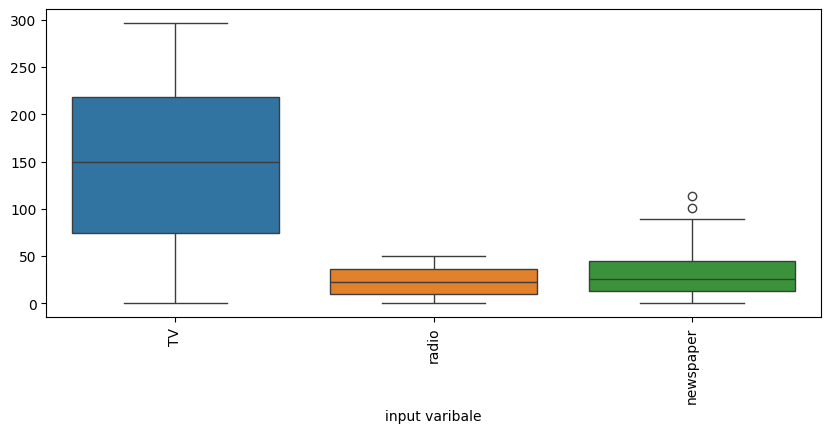

In [ ]:
# 이상치 확인
plt.figure(figsize=(10,4))
sns.boxplot(data=df.drop(columns=['sales']))
plt.xticks(rotation=90)
plt.xlabel('input varibale')
plt.show()

# 딱히 이상치 없음

In [ ]:
### Predictor Variable과 Response Variable을 설정해주세요!
pv=df.drop('sales',axis=1)
rv=df['sales']
print(pv)
print(rv)

        TV  radio  newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]
0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64


In [ ]:
### Multiple Linear Regression을 수행해봅시다!
model=sm.OLS(rv,sm.add_constant(pv))
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 19 Jan 2025   Prob (F-statistic):           1.58e-96
Time:                        17:58:58   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

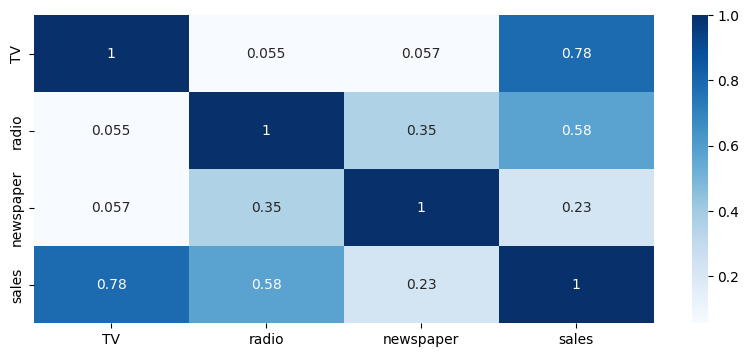

In [ ]:
### Correlation Matrix를 만들어 출력해주세요!
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()